In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import h5py
import matplotlib.pyplot as plt
import json
from numpy import argwhere

In [67]:
# Load the dataset
# hdf5_path = '/kaggle/input/radioml2018/GOLD_XYZ_OSC.0001_1024.hdf5'
# with h5py.File(hdf5_path, 'r') as f:
#     X = (f['X'][:]) #IQ samples
#     Y = (f['Y'][:]) #Modulation labels
#     Z = (f['Z'][:]) #SNR values

# Open the dataset
hdf5_file = h5py.File("/kaggle/input/radioml2018/GOLD_XYZ_OSC.0001_1024.hdf5",  'r')
# Load the modulation classes. You can also copy and paste the content of classes-fixed.txt.
modulation_classes = json.load(open("/kaggle/input/radioml2018/classes-fixed.json", 'r'))

# Read the HDF5 groups
data = hdf5_file['X']
modulation_onehot = hdf5_file['Y']
snr = hdf5_file['Z']

In [72]:
# sample = X[1]
# print(X[1].shape)
# print(Y[1].shape)
# print(Z[1].shape)

print(data.shape)
print(modulation_onehot.shape)
print(snr.shape)
print(data[0])
print(modulation_onehot[1650])
print(modulation_classes[modulation_onehot[1650]])
print(snr[1650])

(2555904, 1024, 2)
(2555904, 24)
(2555904, 1)
[[ 0.0420274   0.23476323]
 [-0.2728826   0.40513492]
 [-0.26707262  0.22749889]
 ...
 [-0.7055947  -0.28693035]
 [-0.41157472  0.66826206]
 [ 0.06487698  0.6358149 ]]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[-20]


In [21]:
print(modulation_classes)

['OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK', '16APSK', '32APSK', '64APSK', '128APSK', '16QAM', '32QAM', '64QAM', '128QAM', '256QAM', 'AM-SSB-WC', 'AM-SSB-SC', 'AM-DSB-WC', 'AM-DSB-SC', 'FM', 'GMSK', 'OQPSK']


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize I and Q signals
def normalize_iq(iq_sample):
    # Extract I and Q components
    I = iq_sample[:, 0]  # In-phase component
    Q = iq_sample[:, 1]  # Quadrature component
    
    # Normalize I and Q independently
    I_norm = (I - np.mean(I)) / np.std(I)
    Q_norm = (Q - np.mean(Q)) / np.std(Q)

    return I_norm, Q_norm

# Function to create and plot I, Q, and their addition
def plot_iq_components(iq_sample):
    # Normalize I and Q signals
    I_norm, Q_norm = normalize_iq(iq_sample)

    # Create a combined signal
    combined_signal = I_norm + Q_norm

    # Create subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Plot I amplitude
    axs[0].plot(I_norm, color='blue', label='Normalized I')
    axs[0].set_title('Normalized In-phase Component (I)')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()
    axs[0].grid()

    # Plot Q amplitude
    axs[1].plot(Q_norm, color='orange', label='Normalized Q')
    axs[1].set_title('Normalized Quadrature Component (Q)')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()
    axs[1].grid()

    # Plot combined signal
    axs[2].plot(combined_signal, color='green', label='Combined Signal (I + Q)')
    axs[2].set_title('Combined Signal (I + Q)')
    axs[2].set_xlabel('Sample Index')
    axs[2].set_ylabel('Amplitude')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

# Assuming 'iq_sample' is your data array from the RadioML dataset for one sample
# Replace this with your actual data extraction logic
# For example: iq_sample = data[0]  # Replace with actual sample index

# For demonstration, let's assume you have a sample
# Uncomment and replace the following line with actual IQ sample extraction
# iq_sample = X[sample_index]  # Replace with actual sample extraction logic

# For now, you can test it with random data for illustration
# iq_sample = np.random.rand(1024, 2)  # Example of 1024 samples of I and Q




4096
[531152]
Retrieving Sample 531152
	- Modulation (raw): [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	- Modulation: QPSK
	- SNR: 30

Power spectrum shape: (1024,)
Frequency array shape: (1024,)


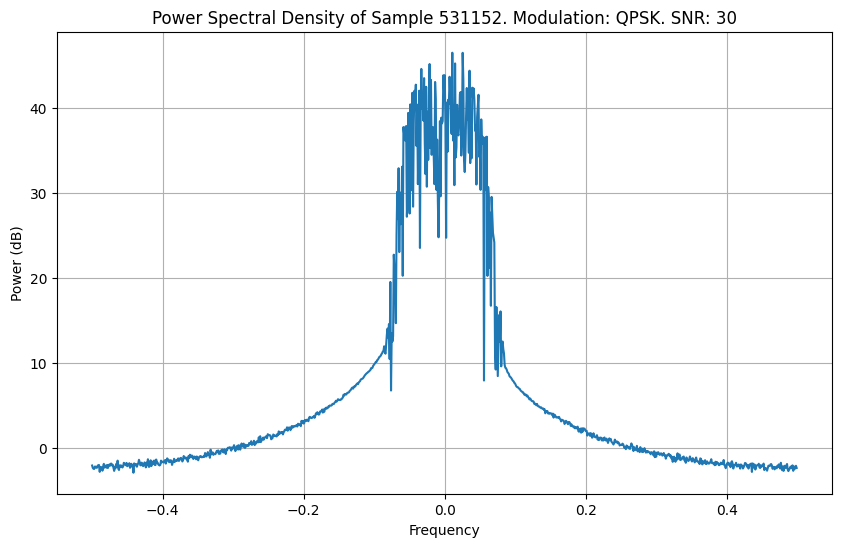

[ 0.90892273+0.02481287j  0.8754576 -0.23104471j  0.8107527 -0.46814796j
 ... -0.5048116 +0.76072025j -0.46400976+0.83837426j
 -0.46136868+0.843564j  ]


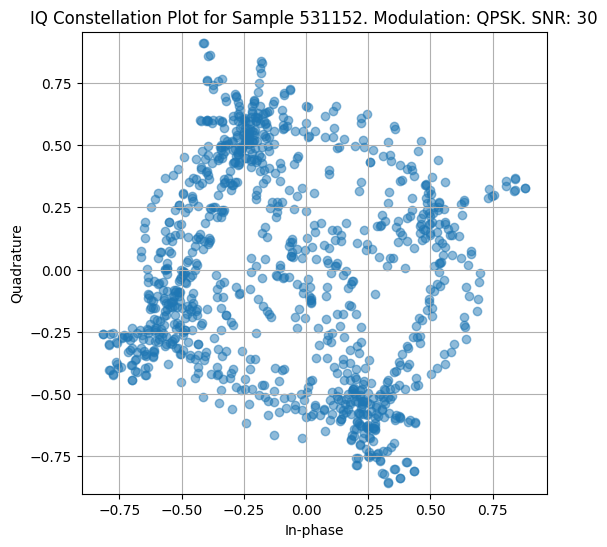

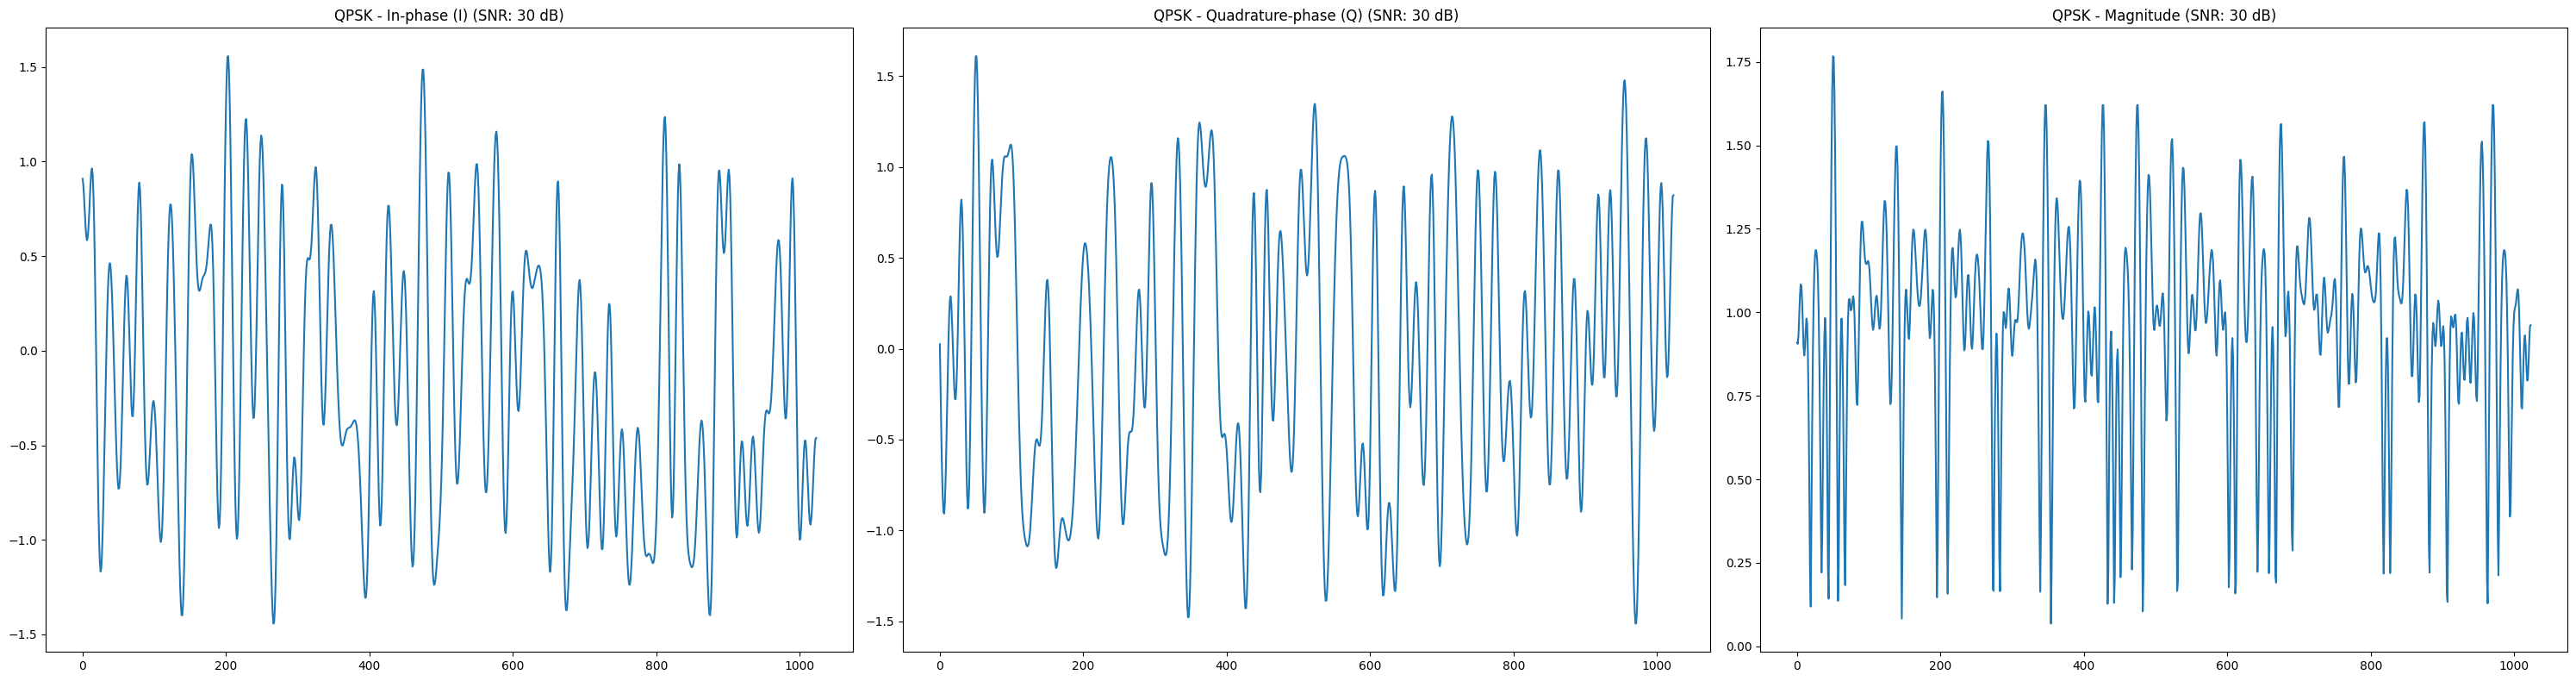

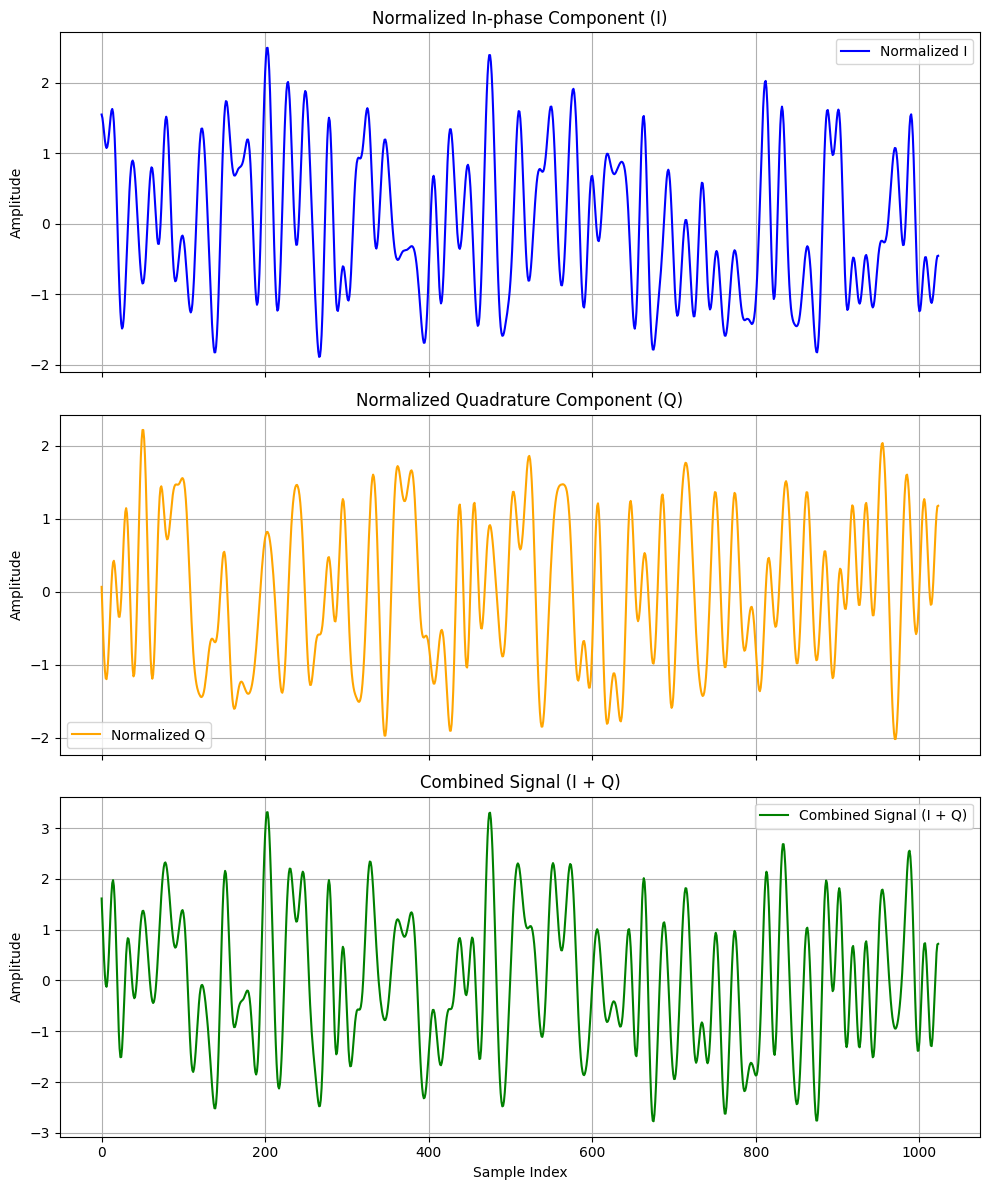

In [77]:
# Function to randomly sample IQ data and plot Power Spectral Density (PSD)
def plot_psd(iq_sample, sample_index, modulation_name, snr_sample, num_samples=1):
    complex_sample = iq_sample[:, 0] + 1j * iq_sample[:, 1]  # Combine I and Q to form a complex signal
    
#     # Converts the onehot encoded modulation to a readable string
#     modulation_str = modulation_classes[int(np.argwhere(modulation_onehot[sample_index] == 1).item())]


#     # Prints info about the frame
#     print(f"Retrieving Sample {sample_index}\n"
#           f"\t- Modulation (raw): {modulation_onehot[sample_index]}\n"
#           f"\t- Modulation: {modulation_str}\n"
#           f"\t- SNR: {snr[sample_index]}\n")
    
    # Compute the power spectrum
    power_spectrum = np.abs(np.fft.fftshift(np.fft.fft(complex_sample)))**2
    freqs = np.fft.fftshift(np.fft.fftfreq(len(complex_sample), d=1))

    print(f"Power spectrum shape: {power_spectrum.shape}")
    print(f"Frequency array shape: {freqs.shape}")
    
    
    
    # Plot Power Spectral Density
    plt.figure(figsize=(10, 6))
    plt.plot(freqs, 10 * np.log10(power_spectrum))
    plt.title(f"Power Spectral Density of Sample {sample_index}. Modulation: {modulation_name}. SNR: {snr_sample}")
    plt.xlabel("Frequency")
    plt.ylabel("Power (dB)")
    plt.grid(True)
    plt.show()

# Function to randomly sample IQ data and plot IQ Constellation
def plot_iq_constellation(iq_sample, sample_index, modulation_name, snr_sample, num_samples=1):
#     random_indices = np.random.choice(len(iq_data), num_samples, replace=False)
#     for sample_index in random_indices:
#         iq_sample = np.array(iq_data[sample_index])
    # Converts the onehot encoded modulation to a readable string
#     modulation_str = modulation_classes[int(np.argwhere(modulation_onehot[sample_index] == 1).item())]

#     iq_symbols = iq_sample[:]
    iq_complex = iq_sample[:, 0] + 1j*iq_sample[:, 1] 
    print(iq_complex)
    # Normalize the IQ points by dividing by the maximum magnitude
    iq_magnitude = np.abs(iq_complex)
    iq_normalized = iq_complex / np.max(iq_magnitude)
#     print(iq_normalized)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(iq_normalized), np.imag(iq_normalized), alpha=0.5)
    plt.title(f"IQ Constellation Plot for Sample {sample_index}. Modulation: {modulation_name}. SNR: {snr_sample}")
    plt.xlabel("In-phase")
    plt.ylabel("Quadrature")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Function to plot SNR Histogram using a random sample of SNR values
def plot_random_snr_histogram(snr, mod_indices, modulation_name, num_samples=1000):
    random_indices = np.random.choice(mod_indices, num_samples, replace=False)
    random_indices.sort()
#     print(random_indices.shape)
#     print(snr_values.shape)
    sampled_snr = np.array(snr[random_indices])
#     print(sampled_snr[:9])
    
#     modulation_str = modulation_classes[int(np.argwhere(modulation_onehot[sample_index] == 1).item())]


#     # Prints info about the frame
#     print(f"Retrieving Sample {sample_index}\n"
#           f"\t- Modulation (raw): {modulation_onehot[sample_index]}\n"
#           f"\t- Modulation: {modulation_str}\n"
#           f"\t- SNR: {snr[sample_index]}\n")
    
    plt.figure(figsize=(8, 6))
    plt.hist(sampled_snr, bins=20, alpha=0.75, edgecolor='black')
    plt.title(f"Histogram of SNR Values ({num_samples} random samples). Modulation: {modulation_name}.")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


def plot_signal(iq_sample, sample_index, modulation_name, snr_sample, num_samples=1):
    plt.figure(figsize=(30, 8))

    I_phase = iq_sample[:, 0]
    Q_phase = iq_sample[:, 1]
    magnitude = np.sqrt((I_phase**2) + (Q_phase**2))

    plt.subplot(1, 3, 1)
    plt.plot(I_phase)
    plt.title(f'{modulation_name} - In-phase (I) (SNR: {snr_sample} dB)')

    plt.subplot(1, 3, 2)
    plt.plot(Q_phase)
    plt.title(f'{modulation_name} - Quadrature-phase (Q) (SNR: {snr_sample} dB)')

    plt.subplot(1, 3, 3)
    plt.plot(magnitude)
    plt.title(f'{modulation_name} - Magnitude (SNR: {snr_sample} dB)')

    plt.tight_layout()
    plt.show()

    
def genPlots(num_samples=1):
    num_samples = 1  
    modulation_type = 'QPSK'
    snr_level = 30
    modulation_index = modulation_classes.index(modulation_type)
#     mod_indices = np.argwhere(modulation_onehot[:, modulation_index] == 1).flatten()
    mod_indices = find_modulation_snr_indices(modulation_type, snr_level, modulation_classes, modulation_onehot, snr)
#     mod_indices = filter_indices(modulation_type, snr_level, modulation_classes, modulation_onehot, snr)
    print(len(mod_indices))
    random_indices = np.random.choice(mod_indices, num_samples, replace=False)
    print(random_indices)
    for sample_index in random_indices:
        # Prints info about the frame
        snr_sample = snr[sample_index].item()
        print(f"Retrieving Sample {sample_index}\n"
          f"\t- Modulation (raw): {modulation_onehot[sample_index]}\n"
          f"\t- Modulation: {modulation_type}\n"
          f"\t- SNR: {snr_sample}\n")
        iq_sample = np.array(data[sample_index])
        plot_psd(iq_sample, sample_index, modulation_type, snr_sample, num_samples=num_samples)
        plot_iq_constellation(iq_sample, sample_index, modulation_type, snr_sample, num_samples=num_samples)
        plot_signal(iq_sample, sample_index, modulation_type, snr_sample, num_samples=num_samples)
        # Generate the plot using your actual IQ sample
        plot_iq_components(iq_sample)  # Call the function with the actual sample
    
    # For histogram, we use 1000 samples   
    plot_random_snr_histogram(snr, mod_indices, modulation_type, num_samples=100)  


# Function to filter indices based on modulation type and SNR level
def filter_indices(modulation_type, snr_level, modulation_classes, modulation_onehot, snr):
    # Find the modulation class index
    modulation_index = modulation_classes.index(modulation_type)
    
    # Get the indices where the modulation type matches
    modulation_indices = np.where(modulation_onehot[:, modulation_index] == 1)[0]
    
    # Further filter the indices based on the specified SNR level
    filtered_indices = []
    for idx in modulation_indices:
        if snr[idx] == snr_level:
            filtered_indices.append(idx)

    return np.array(filtered_indices)
    
def find_modulation_snr_indices(modulation_name, snr_level, classes_fixed, Y, Z):
    modulation_index = classes_fixed.index(modulation_name)
    indices = [i for i, (label, snr) in enumerate(zip(Y, Z)) if np.argmax(label) == modulation_index and snr == snr_level]
    return indices

# sample = X[1]
# print(X[1].shape)
# Example of setting up accumulated data (Replace with actual data loading)
# iq_accumulated = np.array(X)
# label_accumulated = np.array(Y)
# snr_accumulated = np.array(Z)

# Sets the frame number
idx = 0

# # Function to load and parse the classes-fixed.json file
# def load_modulation_classes(json_file_path):
#     with open(json_file_path) as f:
#         data = json.load(f)
#     return data

# # Load the class names from the JSON file
# modulation_classes = load_modulation_classes('/kaggle/input/radioml2018/classes-fixed.json')

genPlots()

# Call the visualization functions using random samples


In [54]:
def plot_signals_by_modulation_snr(modulation_name, snr_level, num_samples):
    indices = find_modulation_snr_indices(modulation_name, snr_level, fixed_classes, modulation_onehot, snr)
    if len(indices) < num_samples:
        print(f"Not enough samples for {modulation_name} with SNR {snr_level} dB. Found only {len(indices)} samples.")
        return

    samples = np.random.choice(indices, num_samples, replace=False)

    for sample in samples:
        plt.figure(figsize=(30, 6))

        I_phase = data[sample, :, 0]
        Q_phase = data[sample, :, 1]
        magnitude = np.sqrt((I_phase**2) + (Q_phase**2))

        plt.subplot(1, 3, 1)
        plt.plot(I_phase)
        plt.title(f'{modulation_name} - In-phase (I) (SNR: {snr_level} dB)')

        plt.subplot(1, 3, 2)
        plt.plot(Q_phase)
        plt.title(f'{modulation_name} - Quadrature-phase (Q) (SNR: {snr_level} dB)')

        plt.subplot(1, 3, 3)
        plt.plot(magnitude)
        plt.title(f'{modulation_name} - Magnitude (SNR: {snr_level} dB)')

        plt.tight_layout()
        plt.show()




['OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK', '16APSK', '32APSK', '64APSK', '128APSK', '16QAM', '32QAM', '64QAM', '128QAM', '256QAM', 'AM-SSB-WC', 'AM-SSB-SC', 'AM-DSB-WC', 'AM-DSB-SC', 'FM', 'GMSK', 'OQPSK']


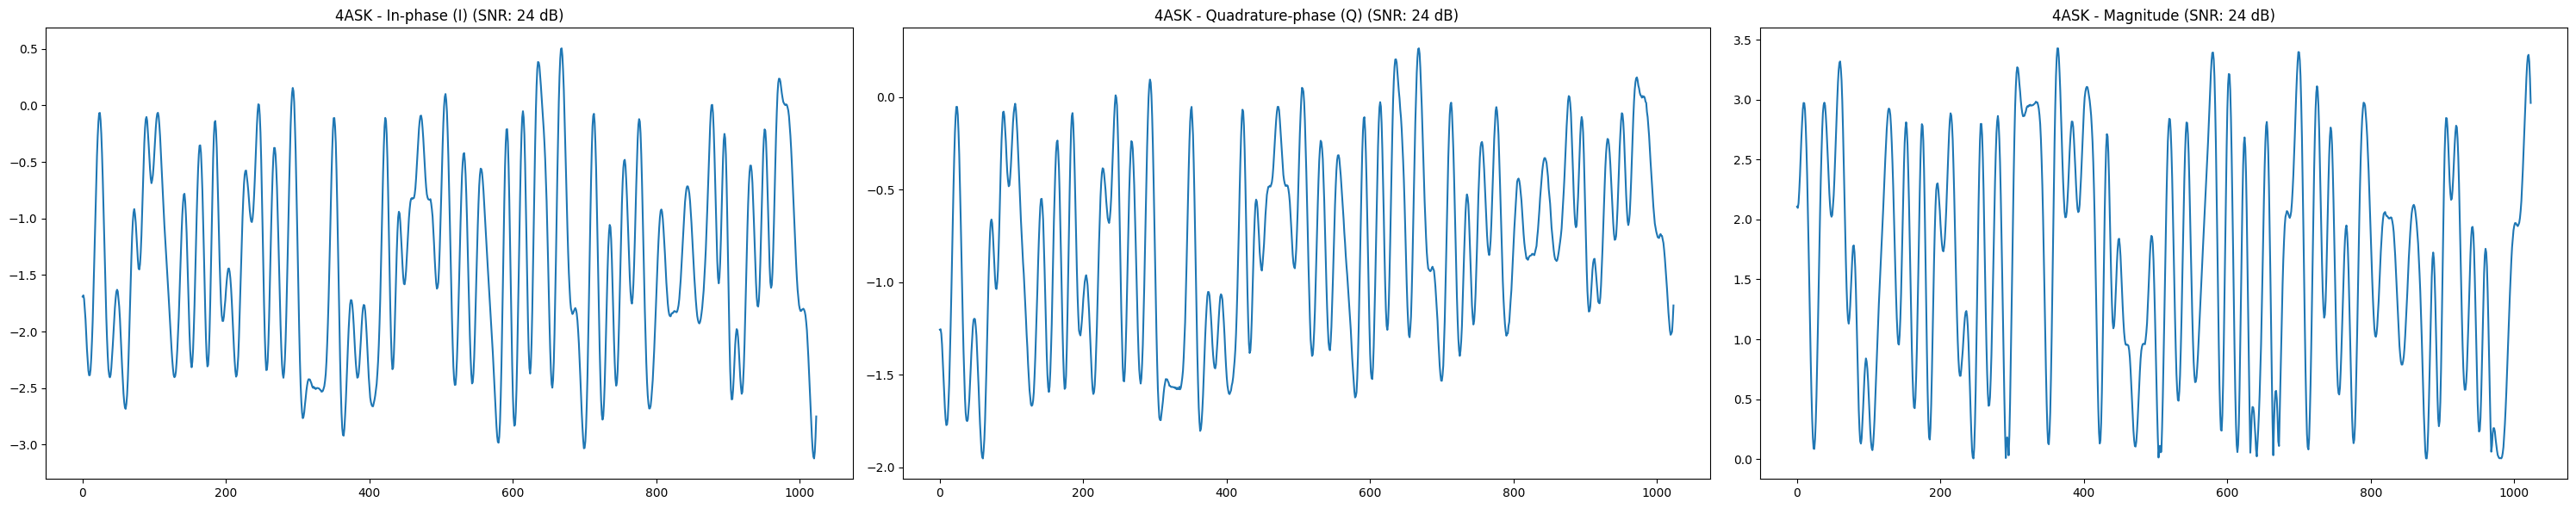

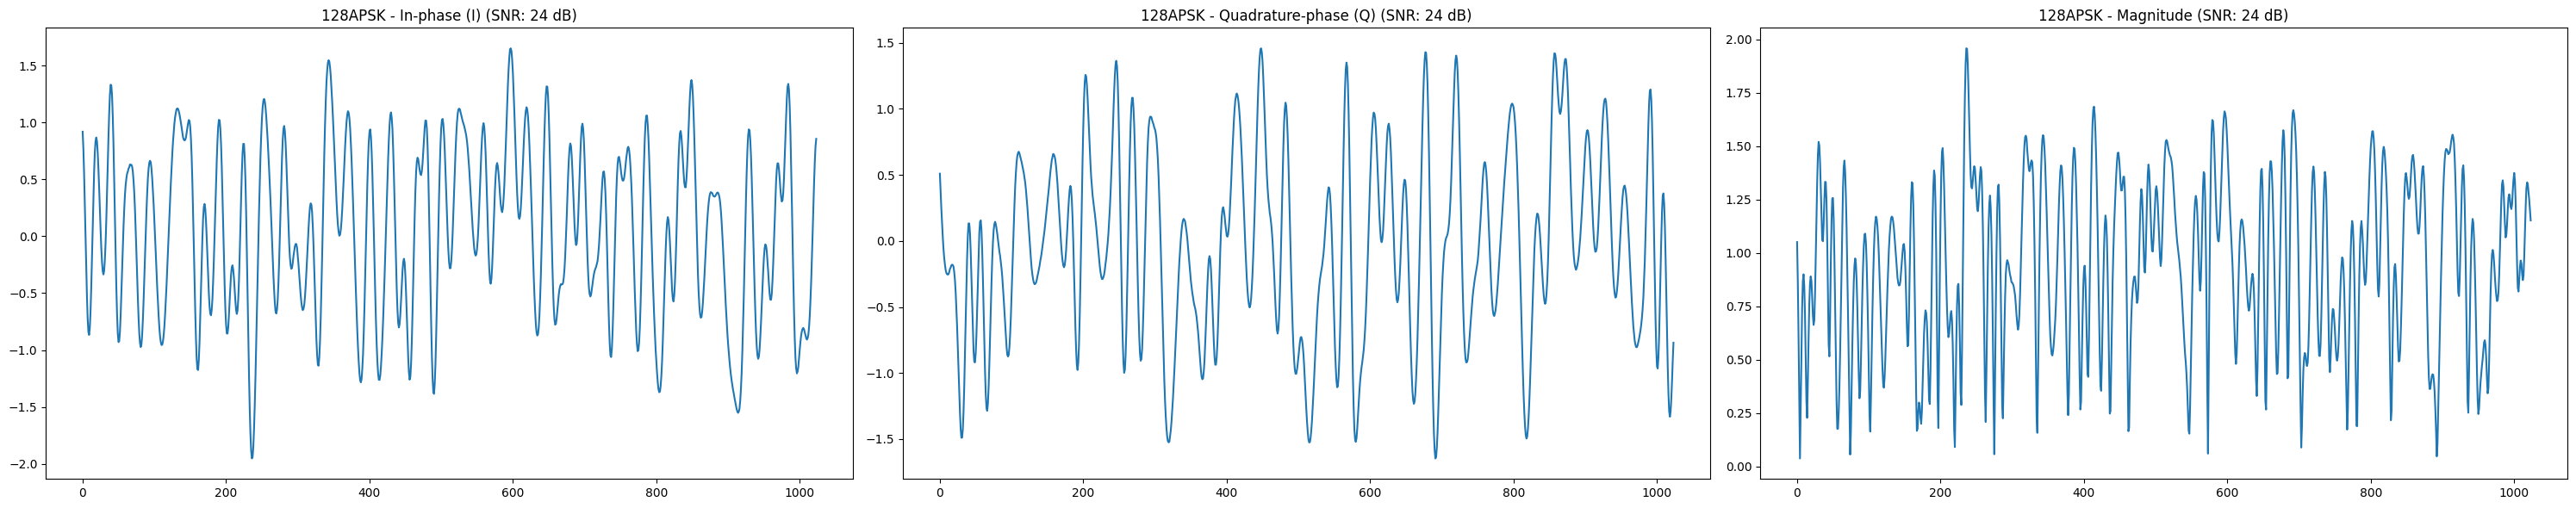

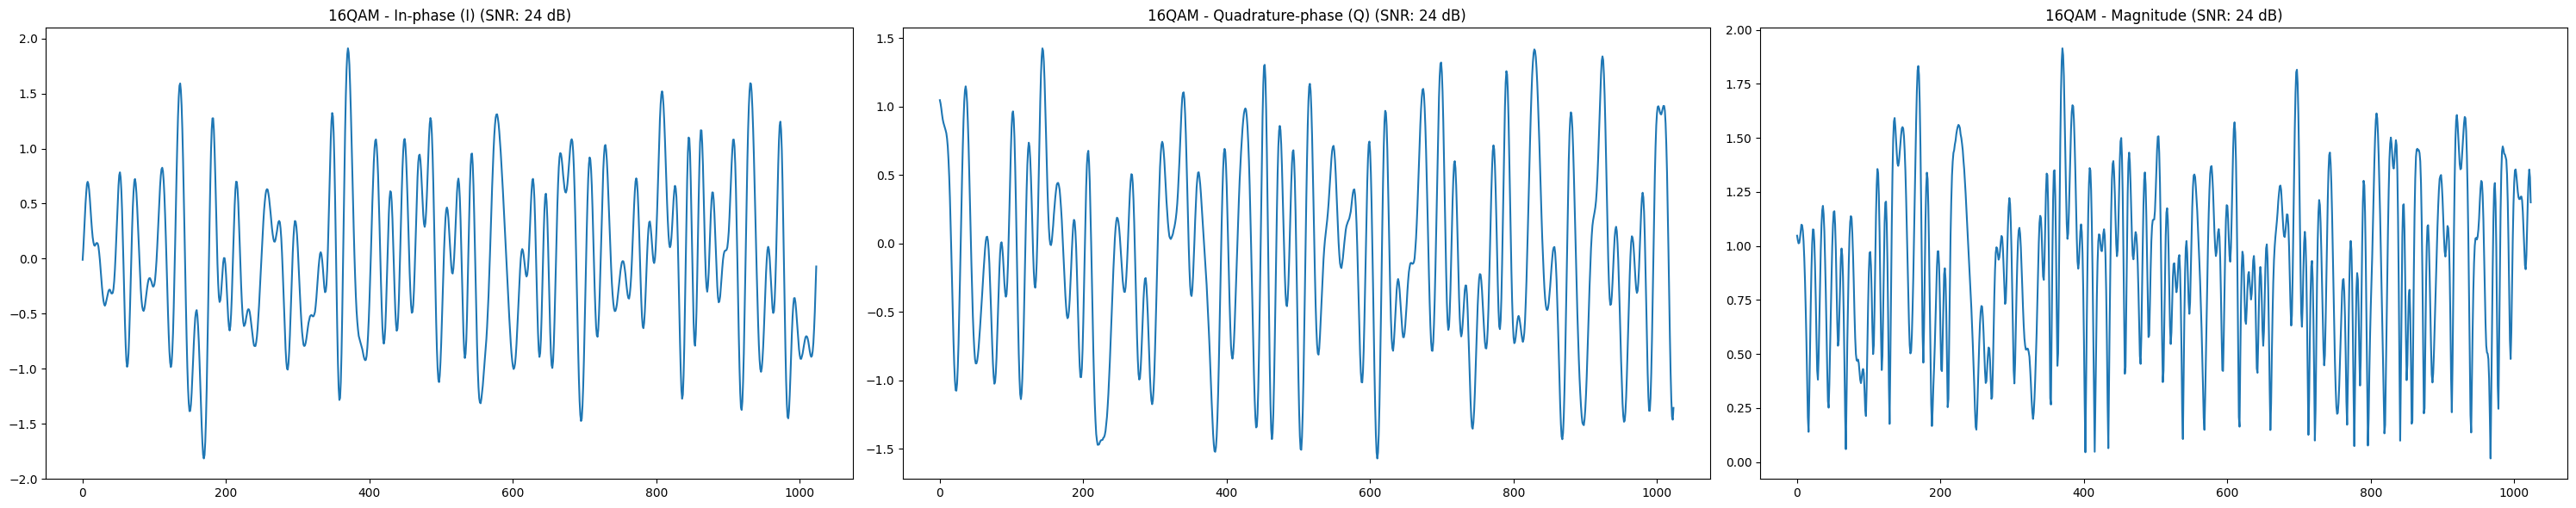

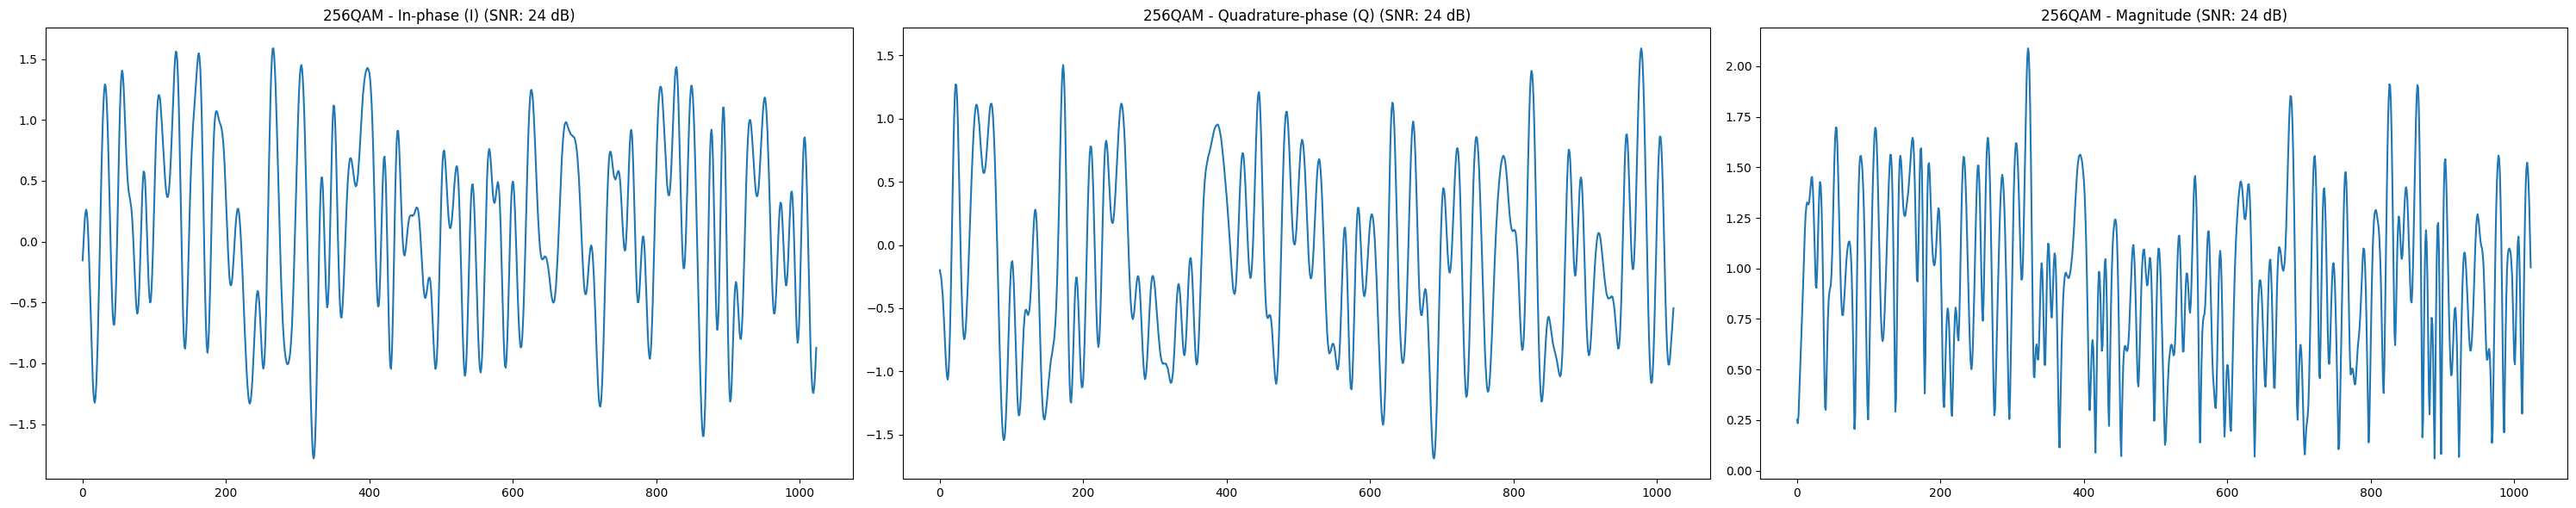

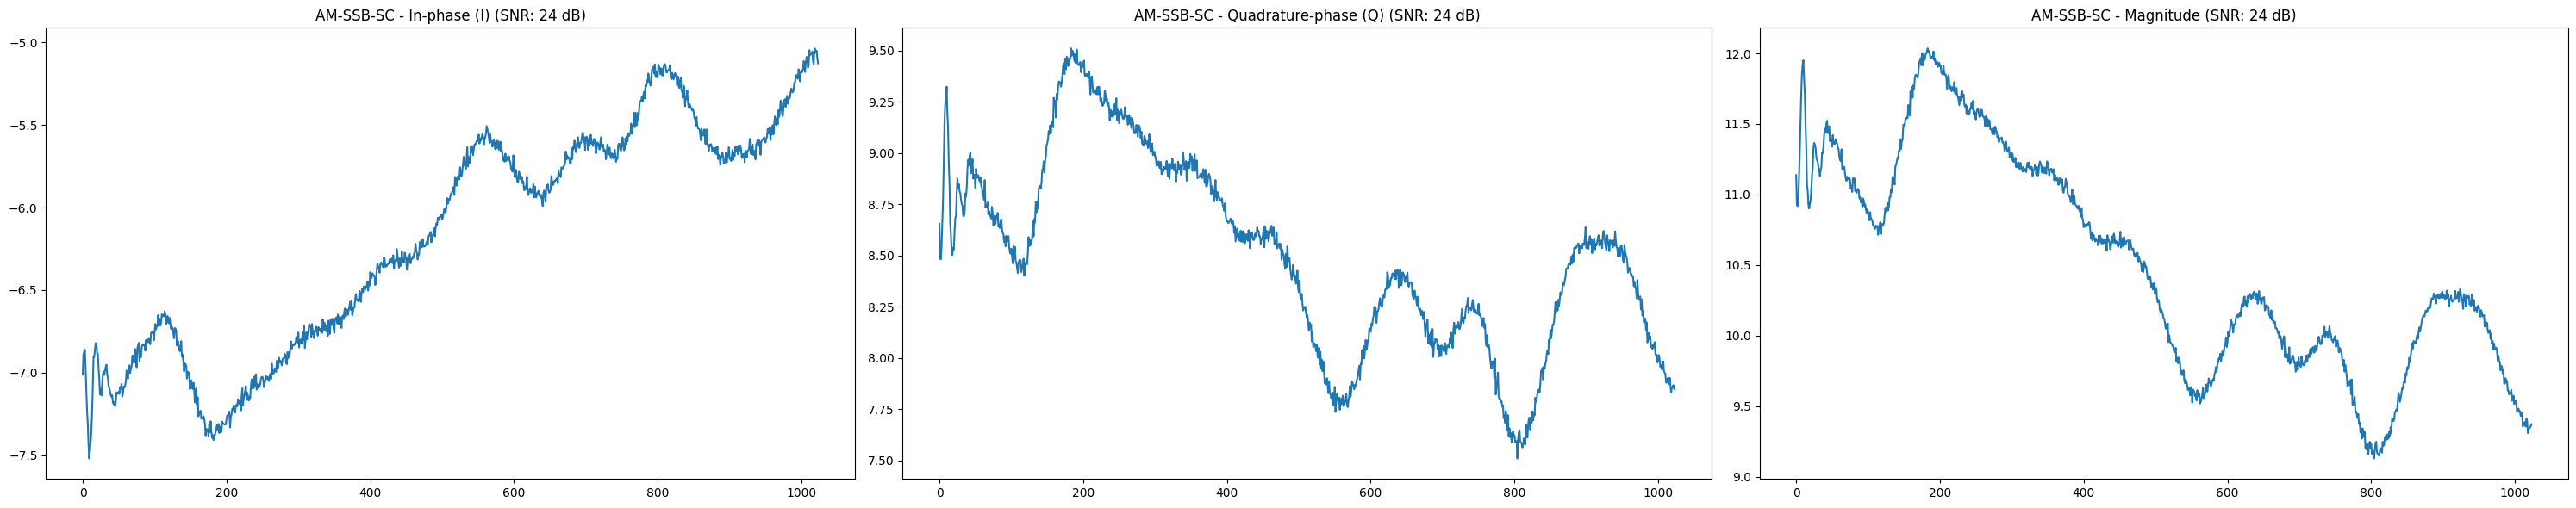

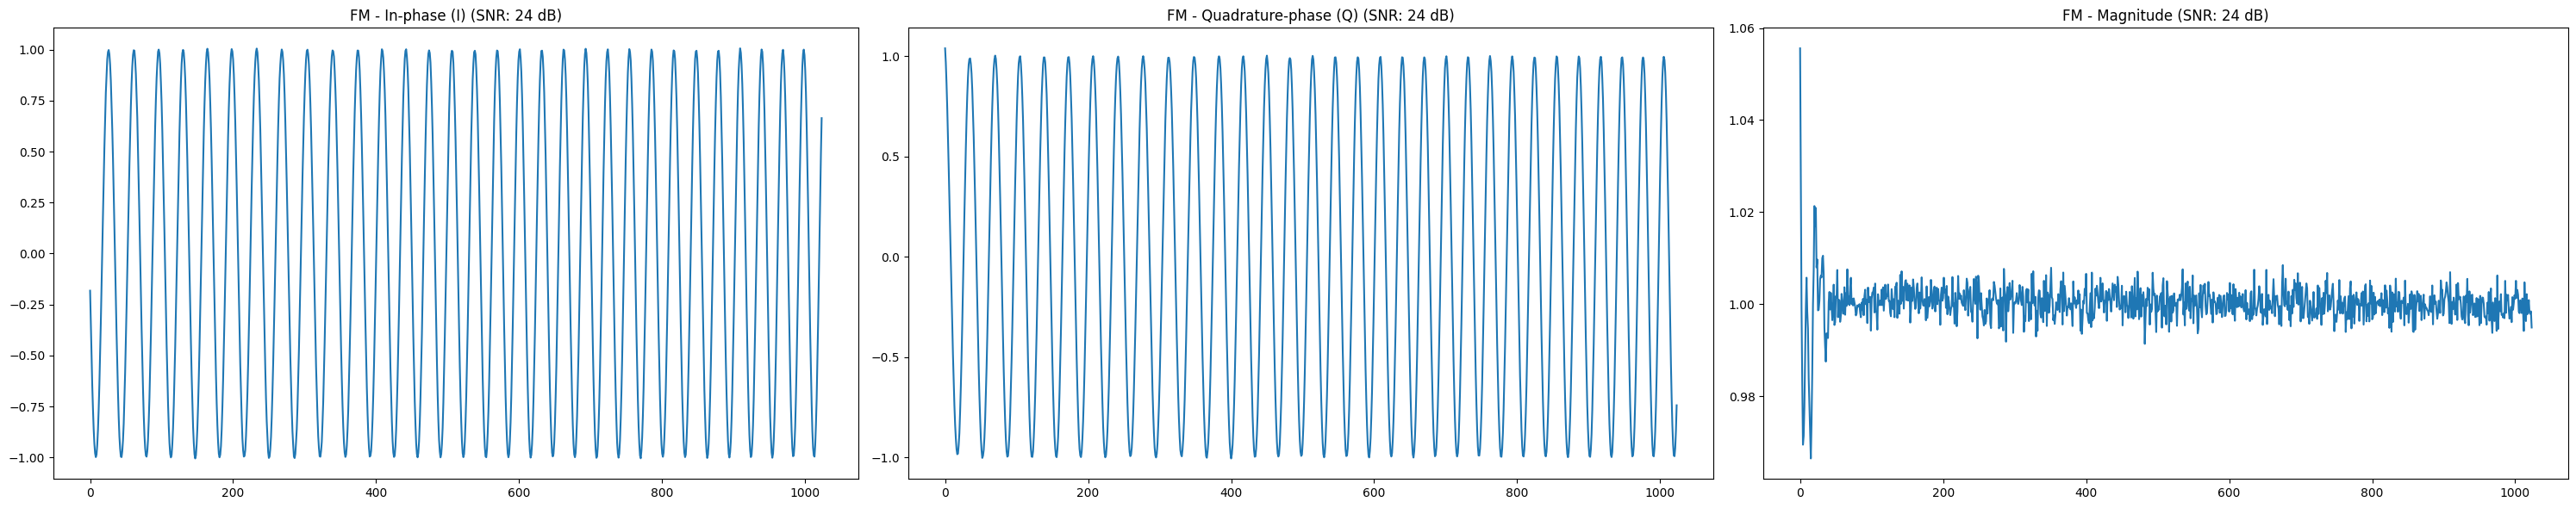

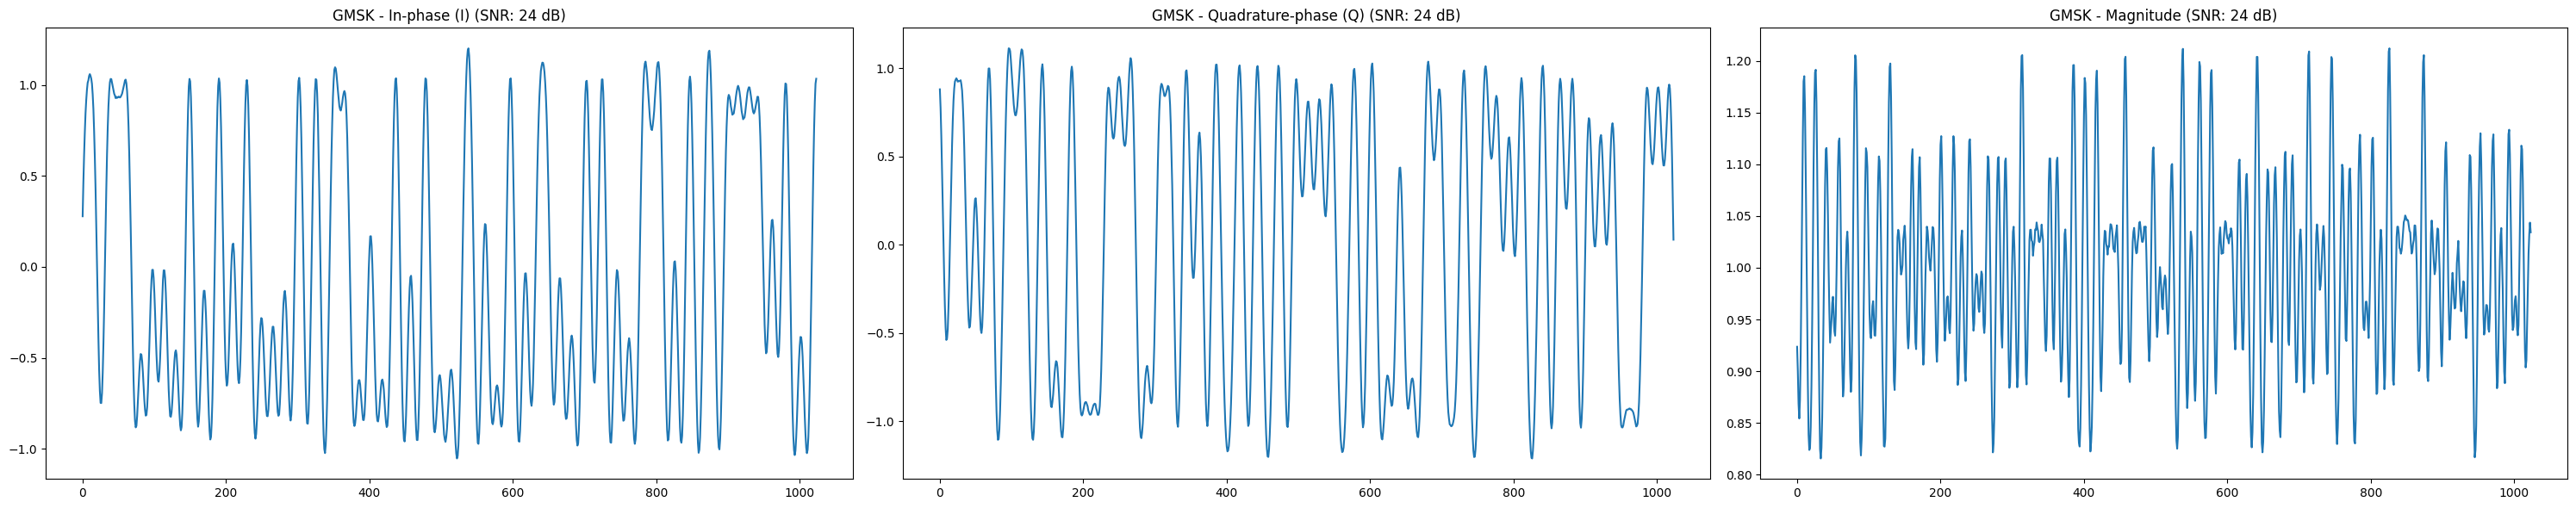

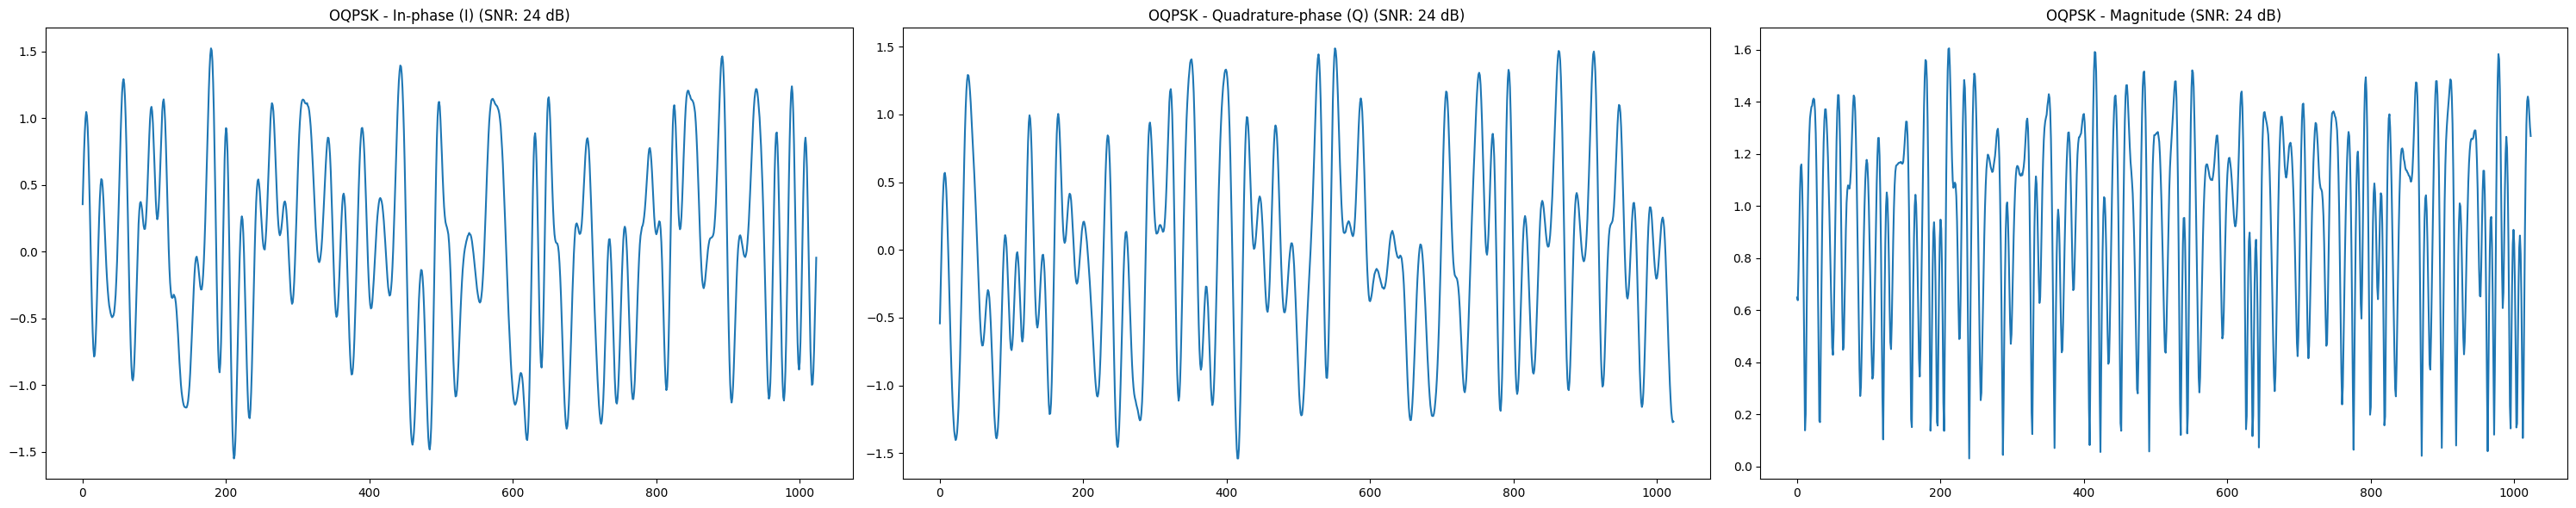

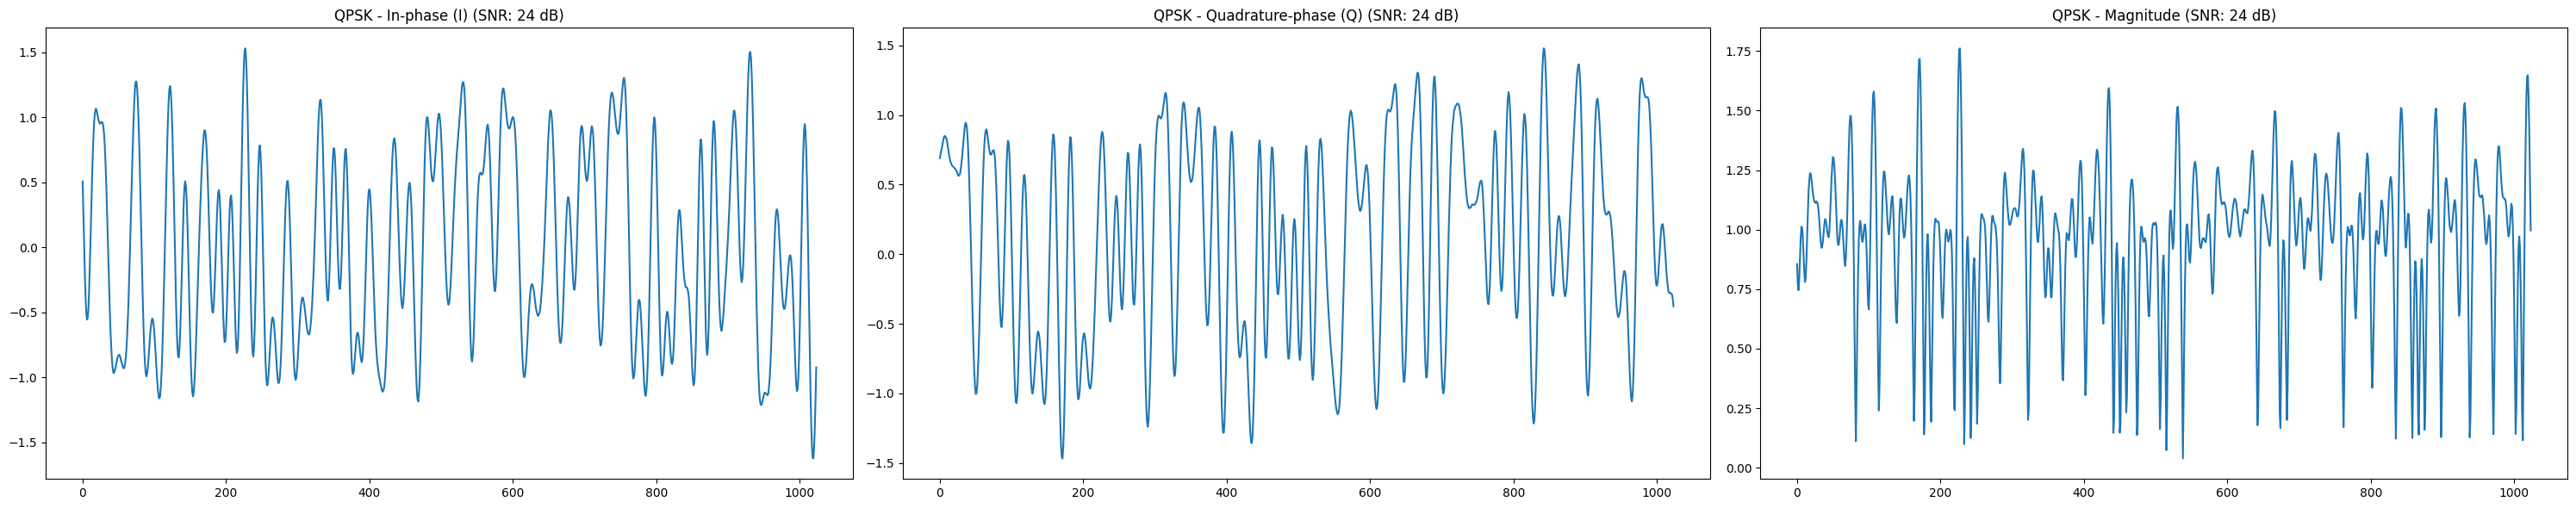

In [55]:
# Function to load and parse the classes-fixed.json file
def load_fixed_classes(json_file_path):
    with open(json_file_path) as f:
        data = json.load(f)
    return data

# Load the class names from the JSON file
fixed_classes = load_fixed_classes('/kaggle/input/radioml2018/classes-fixed.json')

# Print the fixed class names
print(fixed_classes)

plot_signals_by_modulation_snr('4ASK', 24, 1)
plot_signals_by_modulation_snr('128APSK', 24, 1)
plot_signals_by_modulation_snr('16QAM', 24, 1)
plot_signals_by_modulation_snr('256QAM', 24, 1)
plot_signals_by_modulation_snr('AM-SSB-SC', 24, 1)
plot_signals_by_modulation_snr('FM', 24, 1)
plot_signals_by_modulation_snr('GMSK', 24, 1)
plot_signals_by_modulation_snr('OQPSK', 24, 1)
plot_signals_by_modulation_snr('QPSK', 24, 1)